<img src="images\logo_datai.png" width="400" img style="float: right;"> 

https://www.unav.edu/web/instituto-de-ciencia-de-los-datos-e-inteligencia-artificial<br>
Author: Pablo Urruchi Mohino

In [2]:
from IPython.display import Image
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import urllib.request as urllib2
import csv
from datetime import datetime
import pandas as pd

# Web Scraping with Python - Beautifulsoup


References: [Beautiful Soup documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

When we visit a web page, our web browser makes a request to a web server. This request is called a GET request, since we're getting files from the server. The server then sends back files that tell our browser how to render the page for us. The files fall into a few main types:

HTML — contain the main content of the page. <br>
CSS — add styling to make the page look nicer. <br>
JS — Javascript files add interactivity to web pages. <br>
Images — image formats, such as JPG and PNG allow web pages to show pictures.

After our browser receives all the files, it renders the page and displays it to us. There's a lot that happens behind the scenes to render a page nicely, but we don't need to worry about most of it when we're web scraping. When we perform web scraping, we're interested in the main content of the web page, so we look at the HTML

### HTML
HyperText Markup Language (HTML) is a language that web pages are created in. HTML isn't a programming language, like Python. Instead, it's a markup language that tells a browser how to layout content. HTML allows you to do similar things to what you do in a word processor like Microsoft Word: make text bold, create paragraphs, and so on. Because HTML isn't a programming language, it isn't nearly as complex as Python.

Right inside an html tag, we put two other tags, the head tag, and the body tag. The main content of the web page goes into the body tag. The head tag contains data about the title of the page, and other information that generally isn't useful in web scraping:

<img src="images\bsoup1.png" width="500" img style="float: center;">

You may have noticed above that we put the head and body tags inside the html tag. In HTML, tags are nested, and can go inside other tags.



Tags have commonly used names that depend on their position in relation to other tags:

child — a child is a tag inside another tag. So the two p tags above are both children of the body tag.
parent — a parent is the tag another tag is inside. Above, the html tag is the parent of the body tag.
sibiling — a sibiling is a tag that is nested inside the same parent as another tag. For example, head and body are siblings, since they're both inside html. Both p tags are siblings, since they're both inside body.


Here are a few common html tags:

p - paragraph <br>
a - indicates a link <br>
div - indicates a division, or area, of the page. <br>
b - bolds any text inside. <br>
i - italicizes any text inside. <br>
table - creates a table. <br>
form - creates an input form. <br>

This is the complete list of elements you might find: <br>
https://developer.mozilla.org/en-US/docs/Web/HTML/Element


#### Question: what indicates the h1 tag?

In [ ]:
### YOUR ANSWER HERE

## requests

The requests library will make a GET request to a web server, which will download the HTML contents of a given web page for us. 

status_code indicates whether the download was successful or not.
content has the html downloaded content.

resources: <br>
http://docs.python-requests.org/en/master/ <br>
http://www.dataquest.io/blog/python-api-tutorial/ <br>
http://docs.python-requests.org/en/master/user/quickstart/#response-content <br>

In [ ]:
url = 'http://www.example.com'
#headers = {'User-Agent' : 'OpenGraph Extractor (YOUR_EMAIL_HERE)'}
url = requests.get(url)#, None, headers)

## Beautifulsoup

Beautifulsoup is essentialy a parser for html content. In fact, you can specify the parser you need.

In [ ]:
soup = BeautifulSoup(url.content, 'html.parser')

In [ ]:
description_node = soup.find('meta', property = 'og:description')
if description_node:
    description = description_node.get('content')

In [ ]:
description_node

We can now select all the elements at the top level of the page using the children property of soup. Note that children returns a list generator, so we need to call the list function on it:

In [ ]:
list(soup.children)

In [ ]:
#type of each element in the list:
[type(item) for item in list(soup.children)]

As you can see, all of the items are BeautifulSoup objects. The first is a Doctype object, which contains information about the type of the document. The second is a NavigableString, which represents text found in the HTML document. The final item is a Tag object, which contains other nested tags. The most important object type, and the one we'll deal with most often, is the Tag object.

You can now niceliy print the content with prettify, a beautifulsoup object.

In [ ]:
print(soup.prettify())

To extract a single tag, we can simply use the find_all method, which will find all the instances of a tag on a page

In [ ]:
soup.find_all('p')

Note that find_all returns a list, so we'll have to loop through, or use list indexing, it to extract text:

In [ ]:
soup.find_all('p')[0].get_text()

If you instead only want to find the first instance of a tag, you can use the find method, which will return a single BeautifulSoup object:

In [ ]:
soup.find('p')

#### beautifulsoup - Searching for tags by class and id

Classes and ids are used by CSS to determine which HTML elements to apply certain styles to. We can also use them when scraping to specify specific elements we want to scrape. 

We can use the find_all method to search for items by class or by id. In the below example, we'll search for any p tag that has the class period-name:

In [ ]:
soup.find_all('p', class_='class_name')

Instead of specifying a tag, you can also search for any tag which mets your requirements as follows

In [ ]:
soup.find_all(class_="class_name")

Or even search elements by id

In [ ]:
soup.find_all(id="id_name")

## CSS

Another way of seraching items is through CSS selectors. These selectors are how the CSS language allows developers to specify HTML tags to style. Here are some examples:

p a — finds all a tags inside of a p tag. <br>
body p a — finds all a tags inside of a p tag inside of a body tag. <br>
html body — finds all body tags inside of an html tag. <br>
p.outer-text — finds all p tags with a class of outer-text.  <br>
p#first — finds all p tags with an id of first. <br>
body p.outer-text — finds any p tags with a class of outer-text inside of a body tag. <br>

You can find a complete list of selectors here https://developer.mozilla.org/en-US/docs/Web/Guide/CSS/Getting_started/Selectors

BeautifulSoup objects support searching a page via CSS selectors using the select method. We can use CSS selectors to find all the p tags in our page that are inside of a div like this:

In [ ]:
soup.select("div p")

# Example - Weather data

We will now put this in practice: Within the "seven_day" object, you can select as well one of the specific elements within it. Identify them withe the name for this particular case as "tombstone-container".

<img src="images\inspecting4.png" width="700" img style="float: left;">

In [3]:
#page = requests.get("http://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168")
url = "http://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168"
headers = {'User-Agent' : 'OpenGraph Extractor (YOUR_EMAIL_HERE)'}
url = requests.get(url)#, headers)

## get single value

In [13]:
soup = BeautifulSoup(url.content, 'html.parser')
soup.find('p', attrs = {'class':'myforecast-current-lrg'}).text

'51°F'

## get table

In [26]:
table_raw = soup.find_all('div', attrs = {'class':'panel-body','id':'detailed-forecast-body'})
table_rows = soup.find_all('div', attrs = {'class':'row row-odd row-forecast'})
table_rows[0].find('div', attrs = {'class':'col-sm-10 forecast-text'}).text

'Sunny, with a high near 64. Light west wind becoming northwest 5 to 10 mph in the afternoon. Winds could gust as high as 20 mph. '

In [32]:
records = []
for row in table_rows:
    day = row.find('b').text
    desc = row.find('div', attrs = {'class':'col-sm-10 forecast-text'}).text[0:-1]
    records.append((day, desc))

In [33]:
df_table = pd.DataFrame(records, columns=['day', 'desc'])
df_table

,day,desc
0,Today,"Sunny, with a high near 64. Light west wind be..."
1,Saturday,"Sunny, with a high near 63. Northeast wind 6 t..."
2,Sunday,"Sunny, with a high near 64. East wind around 8..."
3,Monday,"Mostly sunny, with a high near 62"
4,Tuesday,"Mostly sunny, with a high near 61"
5,Wednesday,"Sunny, with a high near 63"
6,Thanksgiving Day,"Sunny, with a high near 64"


## get png

In [39]:
image_metadata = soup.find('div', attrs = {'class':'one-sixth-first'})
image_metadata.find('img')['src']

'//graphical.weather.gov/images/thumbnail/latest_MaxMinT_pacsouthwest_thumbnail.png'

In [50]:
res = requests.get('http:'+image_metadata.find('img')['src'])

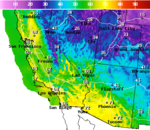

In [51]:
from PIL import Image
from io import BytesIO

img = Image.open(BytesIO(res.content))
img

In [7]:
soup = BeautifulSoup(url.content, 'html.parser')
description_node = soup.find('meta', property = 'og:description')
if description_node:
    description = description_node.get('content')

Inspect the element of your interest. You will find the source code "blocks" are related to the html content. Load that content in an object.

<img src="images\inspecting1.png" width="400" img style="float: left;">
<img src="images\inspecting3.png" width="500" img style="float: right;">

In [6]:
seven_day = soup.find(id="seven-day-forecast")
seven_day

<div class="panel panel-default" id="seven-day-forecast">
<div class="panel-heading">
<b>Extended Forecast for</b>
<h2 class="panel-title">
                San Francisco CA    </h2>
</div>
<div class="panel-body" id="seven-day-forecast-body">
<div id="seven-day-forecast-container"><ul class="list-unstyled" id="seven-day-forecast-list"><li class="forecast-tombstone">
<div class="tombstone-container">
<p class="period-name">Today<br/><br/></p>
<p><img alt="Today: Sunny, with a high near 64. Light west wind becoming northwest 5 to 10 mph in the afternoon. Winds could gust as high as 20 mph. " class="forecast-icon" src="newimages/medium/few.png" title="Today: Sunny, with a high near 64. Light west wind becoming northwest 5 to 10 mph in the afternoon. Winds could gust as high as 20 mph. "/></p><p class="short-desc">Sunny</p><p class="temp temp-high">High: 64 °F</p></div></li><li class="forecast-tombstone">
<div class="tombstone-container">
<p class="period-name">Tonight<br/><br/></p>
<p><im

In [ ]:
forecast_items = seven_day.find_all(class_="tombstone-container")
forecast_items

In [ ]:
#"seven_day" is composed by all this sub elements in the block:
seven_day.find_all('p', attrs={'class' : 'period-name'})

In [ ]:
#This is another way to doing it in a more elegant way
period_tags = seven_day.select(".tombstone-container .period-name")
periods = [pt.get_text() for pt in period_tags]
periods

In [ ]:
#Retrieve the first element "tonight"
tonight = forecast_items[2]
tonight

In [ ]:
#Sort properly with prettyfy
print(tonight.prettify())

In [ ]:
#Get the specific text for each class
period = tonight.find(class_="period-name").get_text()
print(period)
short_desc = tonight.find(class_="short-desc").get_text()
print(short_desc)
temp = tonight.find(class_="temp").get_text()
print(temp)

In [ ]:
#Get the specific text for each class in a loop for the whole "seven_day"'s object
short_descs = [sd.get_text() for sd in seven_day.select(".tombstone-container .short-desc")]
temps = [t.get_text() for t in seven_day.select(".tombstone-container .temp")]
descs = [d["title"] for d in seven_day.select(".tombstone-container img")]

print(short_descs)
print(temps)
print(descs)

In [ ]:
#Put all your columns in a single data frame and give it headers
weather = pd.DataFrame({
        "period": periods, 
        "short_desc": short_descs, 
        "temp": temps, 
        "desc":descs
    })
weather

In [ ]:
#Use regular expressions to clean the temperature as an integer
temp_nums = weather["temp"].str.extract("(?P<temp_num>\d+)", expand=False)
weather["temp_num"] = temp_nums.astype('int')
temp_nums

In [ ]:
is_night = weather["temp"].str.contains("Low")
weather["is_night"] = is_night
is_night

In [ ]:
weather[is_night]

## Exercise

__1. Get the current weather information__

<img src="images\inspecting5.png" width="600" img style="float: center;">

In [ ]:
###YOUR CODE HERE

__2. Get the details of the current forecast__
<img src="images\inspecting6.png" width="600" img style="float: center;">

In [ ]:
###YOUR CODE HERE

__3. Get satellite image__
<img src="images\satellite_png.png" width="800" img style="float: center;">

In [ ]:
###YOUR CODE HERE

# Some additional notes

### Legal risks of web scraping
As handy as web scraping is, it also comes with some legal risks. Since the website operator has actually intended for their website to be used by humans, automated data retrievals using web scrapers can constitute a violation of the terms of use. This is especially true when it is retrieving large amounts of data from multiple pages simultaneously or in rapid succession. A human could not interact with the website in this way.

Furthermore, the automated retrieval, storage and analysis of the data published on the website may constitute a violation of copyright law. If the scraped data contains personally identifiable information, storing and analyzing it without the consent of the person concerned might violate current data protection regulations, e.g. GDPR or CCPA. For example, it is prohibited to scrape Facebook profiles to collect personal information.

### Technical limitations of web scraping
It is often in the interest of website operators to limit the automated scraping of their online offers. Firstly, if large numbers of scrapers access the website, this can negatively affect its performance. Secondly, there are often internal areas of a website that should not appear in search results.

The robots.txt standard was established to limit scrapers’ access to websites. To do so, the website operator places a text file called robots.txt in the root directory of the website. In this file, there are specific entries that define which scrapers or bots are allowed to access which areas of the website. The entries in the robots.txt file always apply to the entire domain.

The following is an example of a robots.txt file that disallows scraping by any bot across the entire website:

Adhering to the restrictions laid out in the robots.txt file is completely voluntary. The bots are supposed to comply with the specifications, but technically, this cannot be enforced. Therefore, to effectively regulate web scrapers’ access to their websites, website operators also use more aggressive techniques. These techniques include restricting their access by limiting throughput and blocking their IP addresses if they repeatedly access the site ignoring the specifications.

### APIs as an alternative to web scraping
While web scraping can be useful, it is not the preferred method for obtaining data from websites. There is often a better way to get this done. Many website operators present their data in a structured, machine-readable format. This data is accessed via special programming interfaces called application programming interfaces (APIs).

There are significant advantages to using an API:

The API is explicitly made available by the provider for the purpose of accessing the data: There are fewer legal risks, and it is easier for the provider to control access to the data. For example, an API key may be required to access the data. The provider can also limit throughput more precisely.
The API delivers the data directly in a machine-readable format: This eliminates the need to tediously extract the data from the source code. In addition, the data structure is separate from its graphical presentation. The structure therefore remains the same even if the website design is changed.
If there is an API available that provides access to all the data, this is the preferred way to access it. However, scraping can in principle be used to retrieve all text presented in a human-readable format on web pages.

### Appendix A: Web scraping advice

- Web scraping works best with **static, well-structured web pages**. Dynamic or interactive content on a web page is often not accessible through the HTML source, which makes scraping it much harder!
- Web scraping is a "fragile" approach for building a dataset. The HTML on a page you are scraping can **change at any time**, which may cause your scraper to stop working.
- If you can **download the data** you need from a website, or if the website provides an **API with data access**, those approaches are preferable to scraping since they are easier to implement and less likely to break.
- If you are **scraping a lot of pages** from the same website (in rapid succession), it's best to insert delays in your code so that you don't overwhelm the website with requests. If the website decides you are causing a problem, they can block your IP address (which may affect everyone in your building!)
- Before scraping a website, you should review its **robots.txt file** (also known as the [Robots exclusion standard](https://en.wikipedia.org/wiki/Robots_exclusion_standard)) to check whether you are "allowed" to scrape their website. (Here is the [robots.txt file for nytimes.com](http://www.nytimes.com/robots.txt).)

### Appendix B: Web scraping resources

- The [Beautiful Soup documentation](http://www.crummy.com/software/BeautifulSoup/bs4/doc/) is written like a tutorial, and is worth reading to gain a detailed understanding of the library.
- For more Beautiful Soup examples, see [Web Scraping 101 with Python](http://www.gregreda.com/2013/03/03/web-scraping-101-with-python/), [More web scraping with Python](http://www.gregreda.com/2013/04/29/more-web-scraping-with-python/), and this [web scraping lesson](http://web.stanford.edu/~zlotnick/TextAsData/Web_Scraping_with_Beautiful_Soup.html) from Stanford's "Text As Data" course.
- [Web Scraping with Python](https://www.youtube.com/watch?v=p1iX0uxM1w8) is a 3-hour video tutorial covering Beautiful Soup and other scraping tools. (The [slides](https://docs.google.com/presentation/d/1uHM_esB13VuSf7O1ScGueisnrtu-6usGFD3fs4z5YCE/edit#slide=id.p) and [code](https://github.com/kjam/python-web-scraping-tutorial) are also available.)
- [Scrapy](http://scrapy.org/) is a popular application framework that is useful for more complex web scraping projects.
- [How a Math Genius Hacked OkCupid to Find True Love](http://www.wired.com/2014/01/how-to-hack-okcupid/all/) and [How Netflix Reverse Engineered Hollywood](http://www.theatlantic.com/technology/archive/2014/01/how-netflix-reverse-engineered-hollywood/282679/?single_page=true) are two fun examples of using web scraping to build an interesting dataset.

### Appendix C: Alternative syntax for Beautiful Soup

It's worth noting that Beautiful Soup actually offers multiple ways to express the same command. I tend to use the most verbose option, since I think it makes the code readable, but it's useful to be able to recognize the alternative syntax since you might see it used elsewhere.

For example, you can **search for a tag** by accessing it like an attribute: